### Homework 3.5 - Noise Reduction

We will try to reduce audio noise using the Fourier trick I shown in the lecture.

In this problem, you will have to make a short record of about 5-10 seconds with a auditable background noise. The source of noise can be fan, air condition, etc. Make sure the noise is constant throughout the audio so that we can easily pick up the noise in the frequency domain.

Be careful the copyrighted materials.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [58]:
from scipy.io import wavfile 
import matplotlib.pyplot as plt
import numpy as np
import scipy.fft

In [59]:
rate, data = wavfile.read('Records/Reflection.wav')

In [60]:
dt = 1/rate
T = np.linspace(0, (len(data)-1)*dt, len(data))

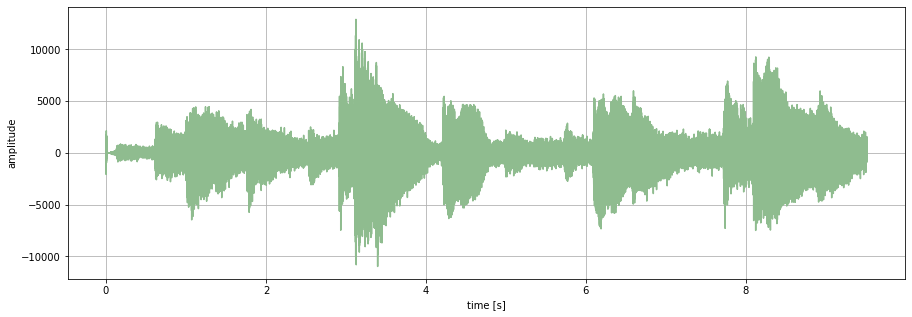

In [61]:
plt.figure(figsize = (15,5))
plt.grid()
plt.plot(T, data, color = 'darkseagreen');
plt.xlabel('time [s]');
plt.ylabel('amplitude');

In [62]:
# Do the fft
data_fft = scipy.fft.rfft(data)
data_freq = scipy.fft.rfftfreq(len(data), dt)

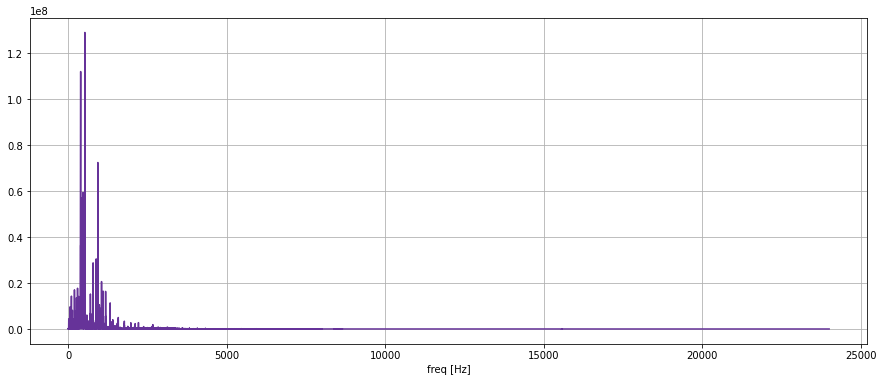

In [63]:
# Get the frequency domain
plt.figure(figsize = (15,6))
plt.grid()
plt.plot(data_freq, np.abs(data_fft), color = 'rebeccapurple');
plt.xlabel('freq [Hz]');

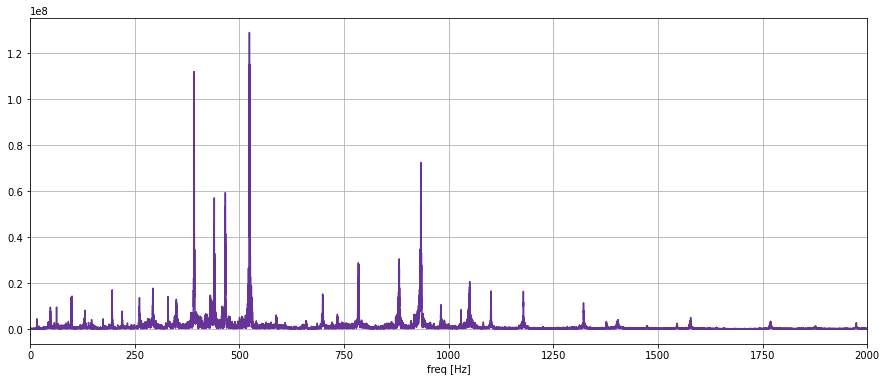

In [176]:
# Get the frequency domain
# Zoom in 
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(0,2000)
plt.plot(data_freq, np.abs(data_fft), color = 'rebeccapurple');
plt.xlabel('freq [Hz]');

In [210]:
# Mask out the noise 
mask1 = np.where(np.logical_and(data_freq > 340, data_freq < 540), 1, 0)
mask2 = np.where(np.logical_and(data_freq > 680, data_freq < 980), 1, 0)
mask3 = np.where(np.logical_and(data_freq > 1000, data_freq < 1100), 1, 0)
mask4 = np.where(np.logical_and(data_freq > 1380, data_freq < 1410), 1, 0)
mask5 = np.where(np.logical_and(data_freq > 1550, data_freq < 1780), 1, 0)
mask = mask1 + mask2 + mask3 + mask4 + mask5

In [211]:
# Apply the mask
data_fft_masked = data_fft * mask

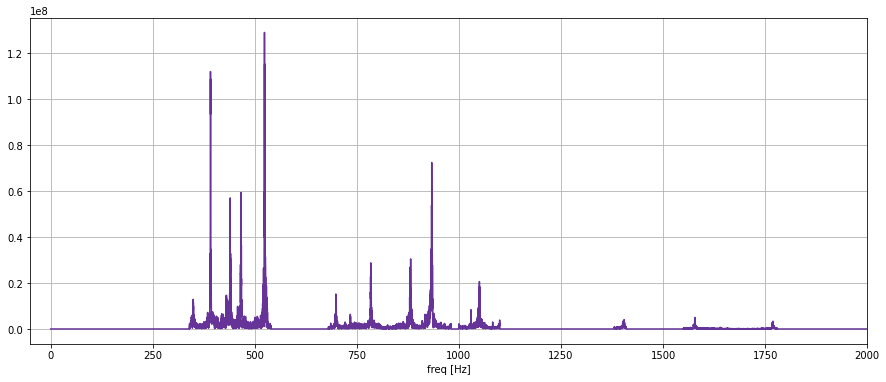

In [206]:
# Get the frequency domain
# Zoom in 
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(-50,2000)
plt.plot(data_freq, np.abs(data_fft_masked), color = 'rebeccapurple');
plt.xlabel('freq [Hz]');

In [207]:
data_irfft = scipy.fft.irfft(data_fft_masked)

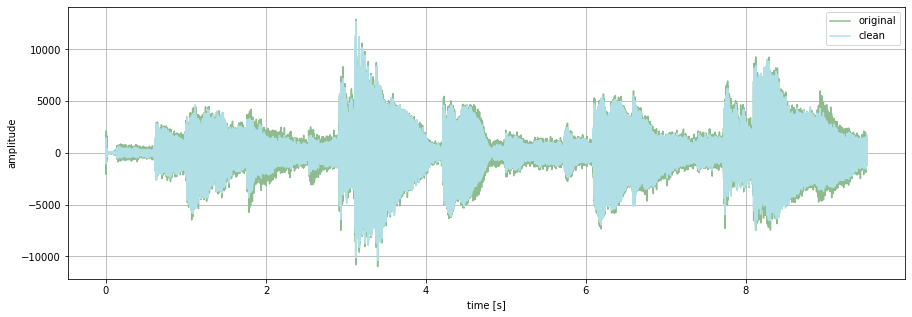

In [212]:
plt.figure(figsize = (15,5))
plt.grid()
plt.plot(T, data, color = 'darkseagreen', label = 'original');
plt.plot(T, data_irfft, color = 'powderblue', label = 'clean');
plt.legend()
plt.xlabel('time [s]');
plt.ylabel('amplitude');

In [213]:
wavfile.write('Records/denoised.wav', rate, np.array(data_irfft, dtype=np.int16))